# Imports and Setup

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
drive_path = '/content/drive/MyDrive/281-Project'
data_path = '/content/EuroSAT_RGB'

In [ ]:
!unzip '/content/drive/MyDrive/281-Project/EuroSAT_RGB.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/EuroSAT_RGB/River/River_145.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1450.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1451.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1452.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1453.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1454.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1455.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1456.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1457.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1458.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1459.jpg  
  inflating: /content/EuroSAT_RGB/River/River_146.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1460.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1461.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1462.jpg  
  inflating: /content/EuroSAT_RGB/River/River_1463.jpg  
  inflating: /content/EuroSAT_RGB/River

# Iterate through dataset

In [ ]:
data_dict = {
    'class_name': [],
    'class_file_num': [],
    'file_name': [],
    'file_path': [],
}

for root, dir_names, file_names in os.walk(data_path):
  class_name = os.path.basename(root)
  for file_name in file_names:
    file_path = os.path.join(root, file_name)
    class_file_num = int(''.join(filter(str.isdigit, file_name)))
    data_dict['class_name'].append(class_name)
    data_dict['class_file_num'].append(class_file_num)
    data_dict['file_name'].append(file_name)
    data_dict['file_path'].append(file_path)


In [ ]:
for key in data_dict.keys():
  print(key)
  print(data_dict[key][:20])
  print()

class_name
['HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation', 'HerbaceousVegetation']

class_file_num
[1288, 703, 2051, 963, 2298, 986, 2302, 1880, 945, 761, 2226, 666, 860, 1236, 2729, 1067, 2518, 792, 2231, 1814]

file_name
['HerbaceousVegetation_1288.jpg', 'HerbaceousVegetation_703.jpg', 'HerbaceousVegetation_2051.jpg', 'HerbaceousVegetation_963.jpg', 'HerbaceousVegetation_2298.jpg', 'HerbaceousVegetation_986.jpg', 'HerbaceousVegetation_2302.jpg', 'HerbaceousVegetation_1880.jpg', 'HerbaceousVegetation_945.jpg', 'HerbaceousVegetation_761.jpg', 'HerbaceousVegetation_2226.jpg', 'Herbaceo

In [ ]:
all_df = pd.DataFrame(data_dict)
all_df

,class_name,class_file_num,file_name,file_path
0,HerbaceousVegetation,1288,HerbaceousVegetation_1288.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...
1,HerbaceousVegetation,703,HerbaceousVegetation_703.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...
2,HerbaceousVegetation,2051,HerbaceousVegetation_2051.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...
3,HerbaceousVegetation,963,HerbaceousVegetation_963.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...
4,HerbaceousVegetation,2298,HerbaceousVegetation_2298.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...
...,...,...,...,...
26995,Residential,151,Residential_151.jpg,/content/EuroSAT_RGB/Residential/Residential_1...
26996,Residential,2430,Residential_2430.jpg,/content/EuroSAT_RGB/Residential/Residential_2...
26997,Residential,2614,Residential_2614.jpg,/content/EuroSAT_RGB/Residential/Residential_2...
26998,Residential,1080,Residential_1080.jpg,/content/EuroSAT_RGB/Residential/Residential_1...


In [ ]:
class_name_map = {
    'Industrial':           0,
    'Residential':          1,
    'Highway':              2,
    'AnnualCrop':           3,
    'PermanentCrop':        4,
    'Pasture':              5,
    'HerbaceousVegetation': 6,
    'Forest':               7,
    'River':                8,
    'SeaLake':              9,
}

In [ ]:
all_df['class_id'] = all_df['class_name'].map(class_name_map)
all_df

,class_name,class_file_num,file_name,file_path,class_id
0,HerbaceousVegetation,1288,HerbaceousVegetation_1288.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...,6
1,HerbaceousVegetation,703,HerbaceousVegetation_703.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...,6
2,HerbaceousVegetation,2051,HerbaceousVegetation_2051.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...,6
3,HerbaceousVegetation,963,HerbaceousVegetation_963.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...,6
4,HerbaceousVegetation,2298,HerbaceousVegetation_2298.jpg,/content/EuroSAT_RGB/HerbaceousVegetation/Herb...,6
...,...,...,...,...,...
26995,Residential,151,Residential_151.jpg,/content/EuroSAT_RGB/Residential/Residential_1...,1
26996,Residential,2430,Residential_2430.jpg,/content/EuroSAT_RGB/Residential/Residential_2...,1
26997,Residential,2614,Residential_2614.jpg,/content/EuroSAT_RGB/Residential/Residential_2...,1
26998,Residential,1080,Residential_1080.jpg,/content/EuroSAT_RGB/Residential/Residential_1...,1


In [ ]:
all_df.sort_values(by=['class_id', 'class_file_num'], inplace=True)
all_df.reset_index(drop=True, inplace=True)
all_df.rename_axis('record_id', inplace=True)
all_df

,class_name,class_file_num,file_name,file_path,class_id
record_id,,,,,
0,Industrial,1,Industrial_1.jpg,/content/EuroSAT_RGB/Industrial/Industrial_1.jpg,0
1,Industrial,2,Industrial_2.jpg,/content/EuroSAT_RGB/Industrial/Industrial_2.jpg,0
2,Industrial,3,Industrial_3.jpg,/content/EuroSAT_RGB/Industrial/Industrial_3.jpg,0
3,Industrial,4,Industrial_4.jpg,/content/EuroSAT_RGB/Industrial/Industrial_4.jpg,0
4,Industrial,5,Industrial_5.jpg,/content/EuroSAT_RGB/Industrial/Industrial_5.jpg,0
...,...,...,...,...,...
26995,SeaLake,2996,SeaLake_2996.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2996.jpg,9
26996,SeaLake,2997,SeaLake_2997.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2997.jpg,9
26997,SeaLake,2998,SeaLake_2998.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2998.jpg,9


In [ ]:
all_df.groupby(['class_name', 'class_id']).count().sort_index(level=1)

,,class_file_num,file_name,file_path
class_name,class_id,,,
Industrial,0,2500,2500,2500
Residential,1,3000,3000,3000
Highway,2,2500,2500,2500
AnnualCrop,3,3000,3000,3000
PermanentCrop,4,2500,2500,2500
Pasture,5,2000,2000,2000
HerbaceousVegetation,6,3000,3000,3000
Forest,7,3000,3000,3000
River,8,2500,2500,2500


In [ ]:
all_df = all_df[[
    'class_name',
    'class_id',
    'class_file_num',
    'file_name',
    'file_path',
]]

all_df

,class_name,class_id,class_file_num,file_name,file_path
record_id,,,,,
0,Industrial,0,1,Industrial_1.jpg,/content/EuroSAT_RGB/Industrial/Industrial_1.jpg
1,Industrial,0,2,Industrial_2.jpg,/content/EuroSAT_RGB/Industrial/Industrial_2.jpg
2,Industrial,0,3,Industrial_3.jpg,/content/EuroSAT_RGB/Industrial/Industrial_3.jpg
3,Industrial,0,4,Industrial_4.jpg,/content/EuroSAT_RGB/Industrial/Industrial_4.jpg
4,Industrial,0,5,Industrial_5.jpg,/content/EuroSAT_RGB/Industrial/Industrial_5.jpg
...,...,...,...,...,...
26995,SeaLake,9,2996,SeaLake_2996.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2996.jpg
26996,SeaLake,9,2997,SeaLake_2997.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2997.jpg
26997,SeaLake,9,2998,SeaLake_2998.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2998.jpg


# Split into Train/Val/Test & Save Metadata

In [ ]:
train_df, val_test_df = train_test_split(
    all_df,
    test_size=0.3,
    stratify=all_df['class_id'],
    random_state=55,
)

In [ ]:
val_df, test_df = train_test_split(
    val_test_df,
    test_size=0.5,
    stratify=val_test_df['class_id'],
    random_state=55,
)

In [ ]:
train_df['dataset'] = 'train'
val_df['dataset'] = 'val'
test_df['dataset'] = 'test'

In [ ]:
all_df = pd.concat([train_df, val_df, test_df])
all_df

,class_name,class_id,class_file_num,file_name,file_path,dataset
record_id,,,,,,
4831,Residential,1,2332,Residential_2332.jpg,/content/EuroSAT_RGB/Residential/Residential_2...,train
2167,Industrial,0,2168,Industrial_2168.jpg,/content/EuroSAT_RGB/Industrial/Industrial_216...,train
20144,Forest,7,1645,Forest_1645.jpg,/content/EuroSAT_RGB/Forest/Forest_1645.jpg,train
7326,Highway,2,1827,Highway_1827.jpg,/content/EuroSAT_RGB/Highway/Highway_1827.jpg,train
9361,AnnualCrop,3,1362,AnnualCrop_1362.jpg,/content/EuroSAT_RGB/AnnualCrop/AnnualCrop_136...,train
...,...,...,...,...,...,...
1803,Industrial,0,1804,Industrial_1804.jpg,/content/EuroSAT_RGB/Industrial/Industrial_180...,test
2534,Residential,1,35,Residential_35.jpg,/content/EuroSAT_RGB/Residential/Residential_3...,test
24121,SeaLake,9,122,SeaLake_122.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_122.jpg,test


In [ ]:
all_df.groupby(['class_name', 'class_id', 'dataset']).count().sort_index(level=1)['file_name']

class_name            class_id  dataset
Industrial            0         test        375
                                train      1750
                                val         375
Residential           1         test        450
                                train      2100
                                val         450
Highway               2         test        375
                                train      1750
                                val         375
AnnualCrop            3         test        450
                                train      2100
                                val         450
PermanentCrop         4         test        375
                                train      1750
                                val         375
Pasture               5         test        300
                                train      1400
                                val         300
HerbaceousVegetation  6         test        450
                                train      2100


In [ ]:
all_df.sort_index(inplace=True)
all_df.reset_index(drop=False, inplace=True)
all_df

,record_id,class_name,class_id,class_file_num,file_name,file_path,dataset
0,0,Industrial,0,1,Industrial_1.jpg,/content/EuroSAT_RGB/Industrial/Industrial_1.jpg,train
1,1,Industrial,0,2,Industrial_2.jpg,/content/EuroSAT_RGB/Industrial/Industrial_2.jpg,test
2,2,Industrial,0,3,Industrial_3.jpg,/content/EuroSAT_RGB/Industrial/Industrial_3.jpg,train
3,3,Industrial,0,4,Industrial_4.jpg,/content/EuroSAT_RGB/Industrial/Industrial_4.jpg,val
4,4,Industrial,0,5,Industrial_5.jpg,/content/EuroSAT_RGB/Industrial/Industrial_5.jpg,train
...,...,...,...,...,...,...,...
26995,26995,SeaLake,9,2996,SeaLake_2996.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2996.jpg,test
26996,26996,SeaLake,9,2997,SeaLake_2997.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2997.jpg,train
26997,26997,SeaLake,9,2998,SeaLake_2998.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2998.jpg,test
26998,26998,SeaLake,9,2999,SeaLake_2999.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2999.jpg,train


In [ ]:
train_df.sort_index(inplace=True)
train_df.reset_index(drop=False, inplace=True)
train_df

,record_id,class_name,class_id,class_file_num,file_name,file_path,dataset
0,0,Industrial,0,1,Industrial_1.jpg,/content/EuroSAT_RGB/Industrial/Industrial_1.jpg,train
1,2,Industrial,0,3,Industrial_3.jpg,/content/EuroSAT_RGB/Industrial/Industrial_3.jpg,train
2,4,Industrial,0,5,Industrial_5.jpg,/content/EuroSAT_RGB/Industrial/Industrial_5.jpg,train
3,6,Industrial,0,7,Industrial_7.jpg,/content/EuroSAT_RGB/Industrial/Industrial_7.jpg,train
4,7,Industrial,0,8,Industrial_8.jpg,/content/EuroSAT_RGB/Industrial/Industrial_8.jpg,train
...,...,...,...,...,...,...,...
18895,26992,SeaLake,9,2993,SeaLake_2993.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2993.jpg,train
18896,26994,SeaLake,9,2995,SeaLake_2995.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2995.jpg,train
18897,26996,SeaLake,9,2997,SeaLake_2997.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2997.jpg,train
18898,26998,SeaLake,9,2999,SeaLake_2999.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2999.jpg,train


In [ ]:
val_df.sort_index(inplace=True)
val_df.reset_index(drop=False, inplace=True)
val_df

,record_id,class_name,class_id,class_file_num,file_name,file_path,dataset
0,3,Industrial,0,4,Industrial_4.jpg,/content/EuroSAT_RGB/Industrial/Industrial_4.jpg,val
1,5,Industrial,0,6,Industrial_6.jpg,/content/EuroSAT_RGB/Industrial/Industrial_6.jpg,val
2,13,Industrial,0,14,Industrial_14.jpg,/content/EuroSAT_RGB/Industrial/Industrial_14.jpg,val
3,23,Industrial,0,24,Industrial_24.jpg,/content/EuroSAT_RGB/Industrial/Industrial_24.jpg,val
4,29,Industrial,0,30,Industrial_30.jpg,/content/EuroSAT_RGB/Industrial/Industrial_30.jpg,val
...,...,...,...,...,...,...,...
4045,26959,SeaLake,9,2960,SeaLake_2960.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2960.jpg,val
4046,26961,SeaLake,9,2962,SeaLake_2962.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2962.jpg,val
4047,26968,SeaLake,9,2969,SeaLake_2969.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2969.jpg,val
4048,26975,SeaLake,9,2976,SeaLake_2976.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2976.jpg,val


In [ ]:
test_df.sort_index(inplace=True)
test_df.reset_index(drop=False, inplace=True)
test_df

,record_id,class_name,class_id,class_file_num,file_name,file_path,dataset
0,1,Industrial,0,2,Industrial_2.jpg,/content/EuroSAT_RGB/Industrial/Industrial_2.jpg,test
1,16,Industrial,0,17,Industrial_17.jpg,/content/EuroSAT_RGB/Industrial/Industrial_17.jpg,test
2,19,Industrial,0,20,Industrial_20.jpg,/content/EuroSAT_RGB/Industrial/Industrial_20.jpg,test
3,31,Industrial,0,32,Industrial_32.jpg,/content/EuroSAT_RGB/Industrial/Industrial_32.jpg,test
4,37,Industrial,0,38,Industrial_38.jpg,/content/EuroSAT_RGB/Industrial/Industrial_38.jpg,test
...,...,...,...,...,...,...,...
4045,26978,SeaLake,9,2979,SeaLake_2979.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2979.jpg,test
4046,26986,SeaLake,9,2987,SeaLake_2987.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2987.jpg,test
4047,26990,SeaLake,9,2991,SeaLake_2991.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2991.jpg,test
4048,26995,SeaLake,9,2996,SeaLake_2996.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2996.jpg,test


In [ ]:
test_df.reset_index(drop=False, inplace=True)
test_df

,record_id,class_name,class_id,class_file_num,file_name,file_path,dataset
0,5,Industrial,0,6,Industrial_6.jpg,/content/EuroSAT_RGB/Industrial/Industrial_6.jpg,test
1,40,Industrial,0,41,Industrial_41.jpg,/content/EuroSAT_RGB/Industrial/Industrial_41.jpg,test
2,44,Industrial,0,45,Industrial_45.jpg,/content/EuroSAT_RGB/Industrial/Industrial_45.jpg,test
3,45,Industrial,0,46,Industrial_46.jpg,/content/EuroSAT_RGB/Industrial/Industrial_46.jpg,test
4,47,Industrial,0,48,Industrial_48.jpg,/content/EuroSAT_RGB/Industrial/Industrial_48.jpg,test
...,...,...,...,...,...,...,...
4045,26949,SeaLake,9,2950,SeaLake_2950.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2950.jpg,test
4046,26950,SeaLake,9,2951,SeaLake_2951.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2951.jpg,test
4047,26957,SeaLake,9,2958,SeaLake_2958.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2958.jpg,test
4048,26970,SeaLake,9,2971,SeaLake_2971.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2971.jpg,test


In [ ]:
all_df.to_csv(os.path.join(drive_path, 'data', 'metadata.csv'), index=False)
train_df.to_csv(os.path.join(drive_path, 'data/train', 'metadata.csv'), index=False)
val_df.to_csv(os.path.join(drive_path, 'data/val', 'metadata.csv'), index=False)
test_df.to_csv(os.path.join(drive_path, 'data/test', 'metadata.csv'), index=False)

In [ ]:
np.save(
    os.path.join(drive_path, 'data', 'labels.npy'),
    np.array(all_df['class_id']),
)
np.save(
    os.path.join(drive_path, 'data/train', 'labels.npy'),
    np.array(train_df['class_id']),
)
np.save(
    os.path.join(drive_path, 'data/val', 'labels.npy'),
    np.array(val_df['class_id']),
)
np.save(
    os.path.join(drive_path, 'data/test', 'labels.npy'),
    np.array(test_df['class_id']),
)

# Read Images, Split into Groups, & Save as Numpy Arrays

In [ ]:
img_list = []
img_ct = len(all_df)

for i, file_path in enumerate(all_df['file_path']):
  if (i+1) % 100 == 0:
    print(f'\r{i+1} of {img_ct}...', end='')
  img_list.append(plt.imread(file_path))

print(f'\r{img_ct} files processed.')

27000 files processed.


In [ ]:
imgs_np = np.stack(img_list)
imgs_np.shape

(27000, 64, 64, 3)

In [ ]:
np.save(
    os.path.join(drive_path, 'data', 'imgs.npy'),
    imgs_np,
)
np.save(
    os.path.join(drive_path, 'data/train', 'imgs.npy'),
    imgs_np[np.array(train_df['record_id']), ... ],
)
np.save(
    os.path.join(drive_path, 'data/val', 'imgs.npy'),
    imgs_np[np.array(val_df['record_id']), ... ],
)
np.save(
    os.path.join(drive_path, 'data/test', 'imgs.npy'),
    imgs_np[np.array(test_df['record_id']), ... ],
)

# Load metadata & images

In [ ]:
all_df = pd.read_csv(os.path.join(drive_path, 'data', 'metadata.csv'))
all_df

,record_id,class_name,class_id,class_file_num,file_name,file_path,dataset
0,0,Industrial,0,1,Industrial_1.jpg,/content/EuroSAT_RGB/Industrial/Industrial_1.jpg,train
1,1,Industrial,0,2,Industrial_2.jpg,/content/EuroSAT_RGB/Industrial/Industrial_2.jpg,test
2,2,Industrial,0,3,Industrial_3.jpg,/content/EuroSAT_RGB/Industrial/Industrial_3.jpg,train
3,3,Industrial,0,4,Industrial_4.jpg,/content/EuroSAT_RGB/Industrial/Industrial_4.jpg,val
4,4,Industrial,0,5,Industrial_5.jpg,/content/EuroSAT_RGB/Industrial/Industrial_5.jpg,train
...,...,...,...,...,...,...,...
26995,26995,SeaLake,9,2996,SeaLake_2996.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2996.jpg,test
26996,26996,SeaLake,9,2997,SeaLake_2997.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2997.jpg,train
26997,26997,SeaLake,9,2998,SeaLake_2998.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2998.jpg,test
26998,26998,SeaLake,9,2999,SeaLake_2999.jpg,/content/EuroSAT_RGB/SeaLake/SeaLake_2999.jpg,train


In [ ]:
all_labels = np.load(os.path.join(drive_path, 'data', 'labels.npy'))
all_labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
all_imgs = np.load(os.path.join(drive_path, 'data', 'imgs.npy'))
all_imgs.shape

(27000, 64, 64, 3)

record_id                                                 5623
class_name                                             Highway
class_id                                                     2
class_file_num                                             124
file_name                                      Highway_124.jpg
file_path         /content/EuroSAT_RGB/Highway/Highway_124.jpg
dataset                                                    val
Name: 5623, dtype: object



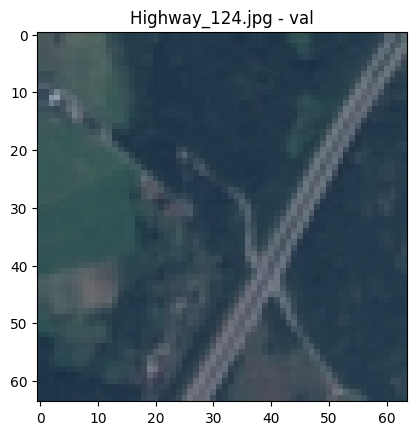

In [123]:
sample_id = 5623
sample_img = all_imgs[sample_id]
sample_info = all_df.iloc[sample_id]
print(sample_info)
print()

plt.imshow(sample_img)
plt.title(sample_info['file_name'] + ' - ' + sample_info['dataset'])
plt.show()